In [36]:
import glob
import json


import geopandas as gpd
import matplotlib
%matplotlib inline
import pandas as pd
import numpy as np
from shapely.geometry import Point

from datetime import datetime
import matplotlib.pyplot as plt


In [77]:
dfs = pd.concat([pd.read_csv(x) for x in glob.glob("output/*.csv") if "bad" not in x])
dfs = dfs.dropna(subset=["rate"])
dfs["start_t"] = pd.to_datetime(dfs["start_t"])


In [78]:
dfs.head()

,Unnamed: 0,TripID,distance,time,rate,corridor,n,start_t,end_t
1,1,898279020,1967.089440,176.0,11.176645,i,5.0,2019-03-14 05:47:42,2019-03-14 05:50:38
2,2,898281020,2722.360964,173.0,15.736191,i,4.0,2019-03-14 05:21:50,2019-03-14 05:24:43
3,3,898282020,1540.907053,165.0,9.338831,i,4.0,2019-03-14 17:52:52,2019-03-14 17:55:37
4,4,898283020,2110.556592,408.0,5.172933,i,8.0,2019-03-14 15:12:51,2019-03-14 15:19:39
5,5,898284020,2943.632630,155.0,18.991178,i,4.0,2019-03-13 23:34:46,2019-03-13 23:37:21


In [79]:
dfs["start_dt"] = pd.to_datetime(dfs["start_t"])
dfs["start_hour"] = dfs["start_dt"].dt.hour


In [80]:
before = dfs[dfs["start_dt"] < datetime(2019, 6, 3)]
after = dfs[dfs["start_dt"] >= datetime(2019, 6, 3)]

In [24]:
before[(before["start_hour"] > 7) & (before["start_hour"] <= 10)]["rate"].mean(), after[(after["start_hour"] > 7) & (after["start_hour"] <= 10)]["rate"].mean()

(11.035733818959658, 11.41205685795731)

In [25]:
before[(before["start_hour"] > 16) & (before["start_hour"] <= 19)]["rate"].mean(), after[(after["start_hour"] > 16) & (after["start_hour"] <= 19)]["rate"].mean()

(9.977125731546563, 10.405063258858329)

In [26]:
i_before = before[before["corridor"] == "i"]
i_after = after[after["corridor"] == "i"]
(i_before[(i_before["start_hour"] > 16) & (i_before["start_hour"] <= 19)]["rate"].mean(), 
i_after[(i_after["start_hour"] > 16) & (i_after["start_hour"] <= 19)]["rate"].mean())

(10.452036629085633, 11.388992783083786)

In [27]:
(11.4 - 10.4) / 10.4

0.09615384615384615

In [28]:
h_before = before[before["corridor"] == "h"]
h_after = after[after["corridor"] == "h"]
(h_before[(h_before["start_hour"] > 7) & (h_before["start_hour"] <= 10)]["rate"].mean(), 
h_after[(h_after["start_hour"] > 7) & (h_after["start_hour"] <= 10)]["rate"].mean())

(11.12611728034851, 11.849982860221926)

In [53]:
def pad(x): 
    return '0' + x if len(x) < 2 else x
dfs["days_since"] = (dfs["start_dt"] - dfs["start_dt"].min()).dt.days

In [62]:
means.head()

days_since  corridor  start_hour
0           h         0             10.982935
                      2             19.046111
                      3             13.236957
                      4             13.513223
                      5             16.882168
Name: rate, dtype: float64

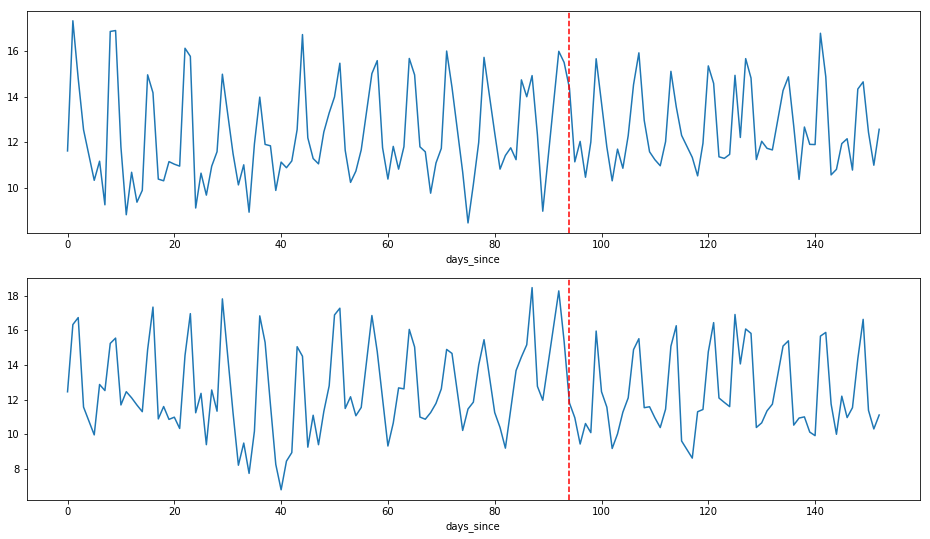

In [64]:
means = dfs[dfs.start_hour.isin({7, 8, 9, 10})].groupby(["days_since", "corridor"]).rate.mean()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 9))
means[:,"h"].sort_index().plot(ax=ax1)
means[:,"i"].sort_index().plot(ax=ax2)
# 94 days is the 6-03 delta
[q.axvline(94, color='red', linestyle='dashed') for q in [ax1, ax2]]

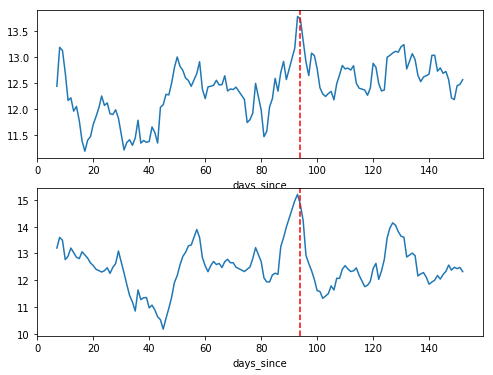

In [74]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

means[:,"h"].sort_index().rolling(7).mean().plot(ax=ax1)
means[:,"i"].sort_index().rolling(7).mean().plot(ax=ax2)
[q.axvline(94, color='red', linestyle='dashed') for q in [ax1, ax2]]

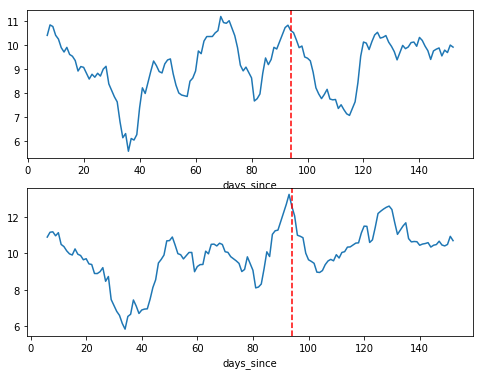

In [75]:
means = dfs[dfs.start_hour.isin({16, 17, 18})].groupby(["days_since", "corridor"]).rate.mean()
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

means[:,"h"].sort_index().rolling(7).mean().plot(ax=ax1)
means[:,"i"].sort_index().rolling(7).mean().plot(ax=ax2)
[q.axvline(94, color='red', linestyle='dashed') for q in [ax1, ax2]]